Import and Load Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load Dataset

In [2]:

file_path = 'EUR_USD Historical Data3.csv'  
df = pd.read_csv(file_path)

# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Inspect the dataset
print("Dataset shape:", df.shape)
df.head()


Dataset shape: (11284, 7)


,Date,Price,Open,High,Low,Vol.,Change %
0,2025-02-21,1.0477,1.0501,1.0505,1.0469,NaN,-0.22%
1,2025-02-20,1.0500,1.0422,1.0504,1.0418,NaN,0.76%
2,2025-02-19,1.0421,1.0443,1.0462,1.0401,NaN,-0.23%
3,2025-02-18,1.0445,1.0484,1.0488,1.0435,NaN,-0.35%
4,2025-02-17,1.0482,1.0489,1.0507,1.0467,NaN,-0.09%


Basic Statistical Summary

In [3]:
# Cell 3: Quick statistical overview
df.describe()


,Date,Price,Open,High,Low,Vol.
count,11284,11284.000000,11284.000000,11284.000000,11284.000000,0.0
mean,2012-01-05 09:01:20.397022464,1.210511,1.210646,1.215975,1.205257,NaN
min,2001-01-22 00:00:00,0.837800,0.836900,0.848000,0.834700,NaN
25%,2006-06-20 00:00:00,1.107500,1.107700,1.111400,1.103500,NaN
50%,2011-11-15 12:00:00,1.208850,1.209100,1.214000,1.204100,NaN
75%,2017-04-12 00:00:00,1.323300,1.323300,1.329300,1.317100,NaN
max,2025-02-21 00:00:00,1.598700,1.599600,1.603900,1.586500,NaN
std,NaN,0.152648,0.152678,0.153419,0.151844,NaN


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11284 entries, 0 to 11283
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              11284 non-null  datetime64[ns]
 1   Price             11284 non-null  float64       
 2   Open              11284 non-null  float64       
 3   High              11284 non-null  float64       
 4   Low               11284 non-null  float64       
 5   Change %          11284 non-null  float64       
 6   Change % Rolling  11278 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 617.2 KB


In [4]:
df = df.drop(columns=['Vol.'])

Check Data Types and Missing Values

In [5]:
print("Data types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())

Data types:
 Date        datetime64[ns]
Price              float64
Open               float64
High               float64
Low                float64
Change %            object
dtype: object

Missing values:
 Date        0
Price       0
Open        0
High        0
Low         0
Change %    0
dtype: int64


Price Trend Over Time

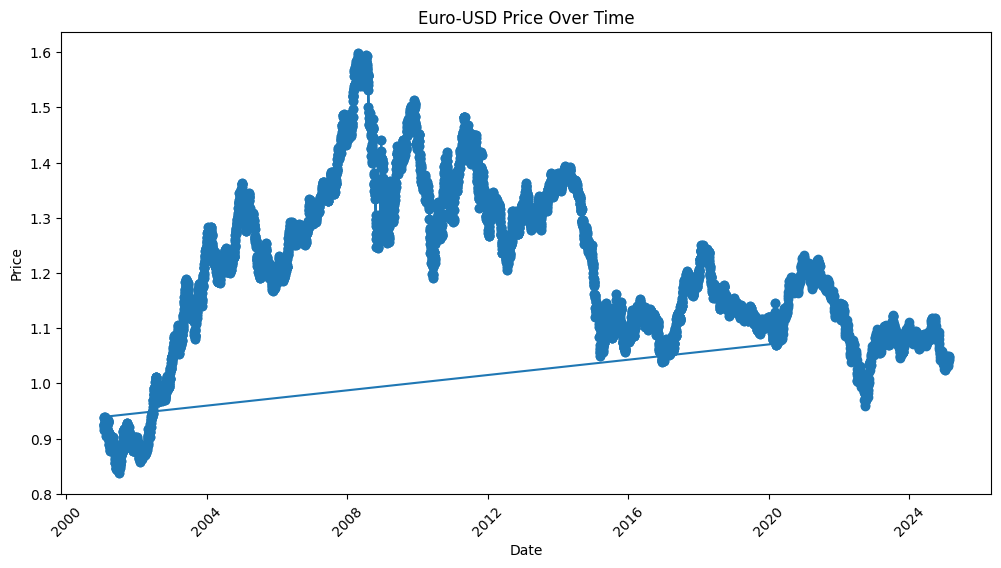

In [6]:
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Price'], marker='o', linestyle='-')
plt.title('Euro-USD Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

Histogram of Price Distribution

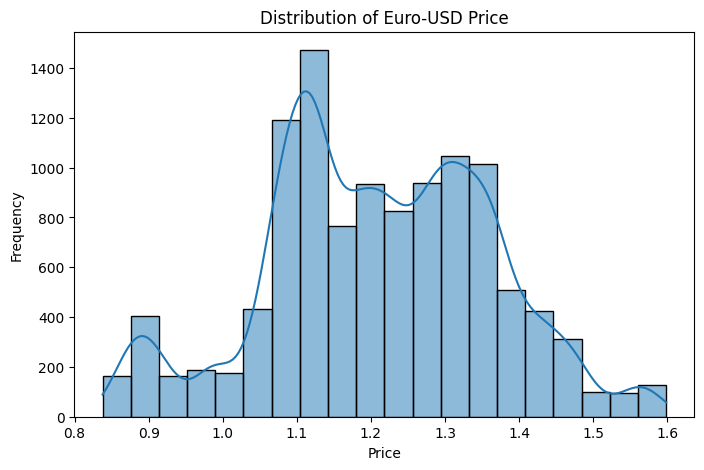

In [7]:
plt.figure(figsize=(8,5))
sns.histplot(df['Price'], bins=20, kde=True)
plt.title('Distribution of Euro-USD Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

Correlation Between Features

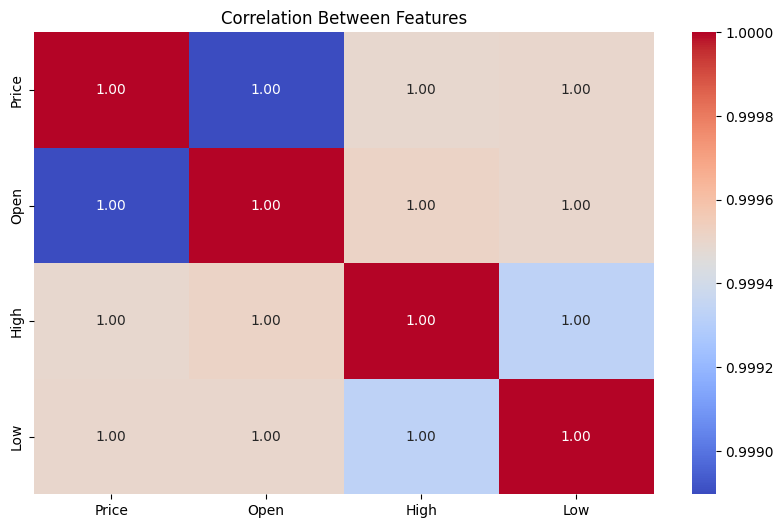

In [8]:
plt.figure(figsize=(10,6))
corr = df[['Price','Open','High','Low']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Features')
plt.show()

Change % Trend

C:\Users\ayoub\AppData\Local\Temp\ipykernel_20776\368828347.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.set_index('Date').resample('M').mean()


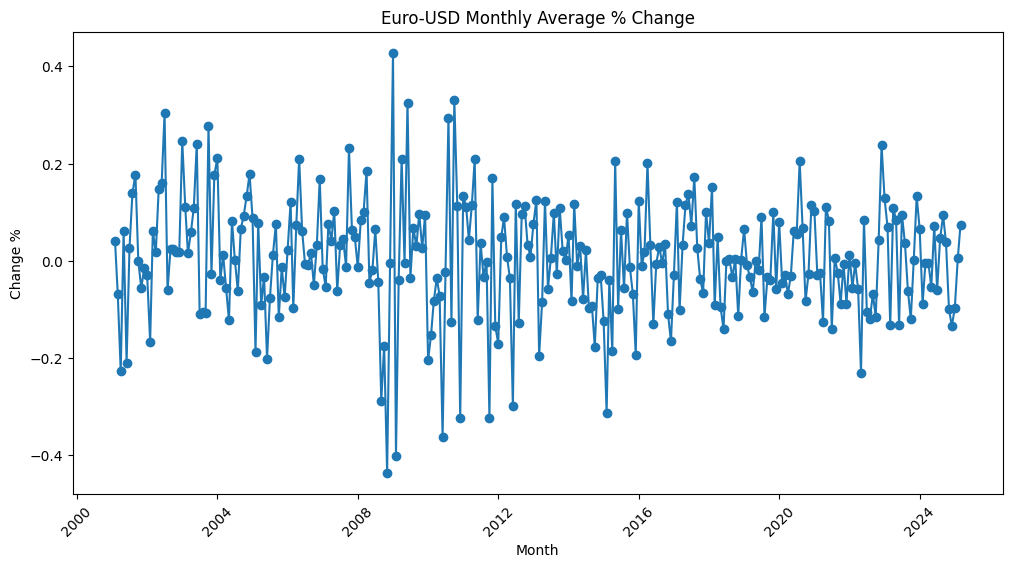

In [11]:
# Resample data by month and take the mean
df_monthly = df.set_index('Date').resample('M').mean()

plt.figure(figsize=(12,6))
plt.plot(df_monthly.index, df_monthly['Change %'], marker='o', linestyle='-')
plt.title('Euro-USD Monthly Average % Change')
plt.xlabel('Month')
plt.ylabel('Change %')
plt.xticks(rotation=45)
plt.show()


Outlier Detection

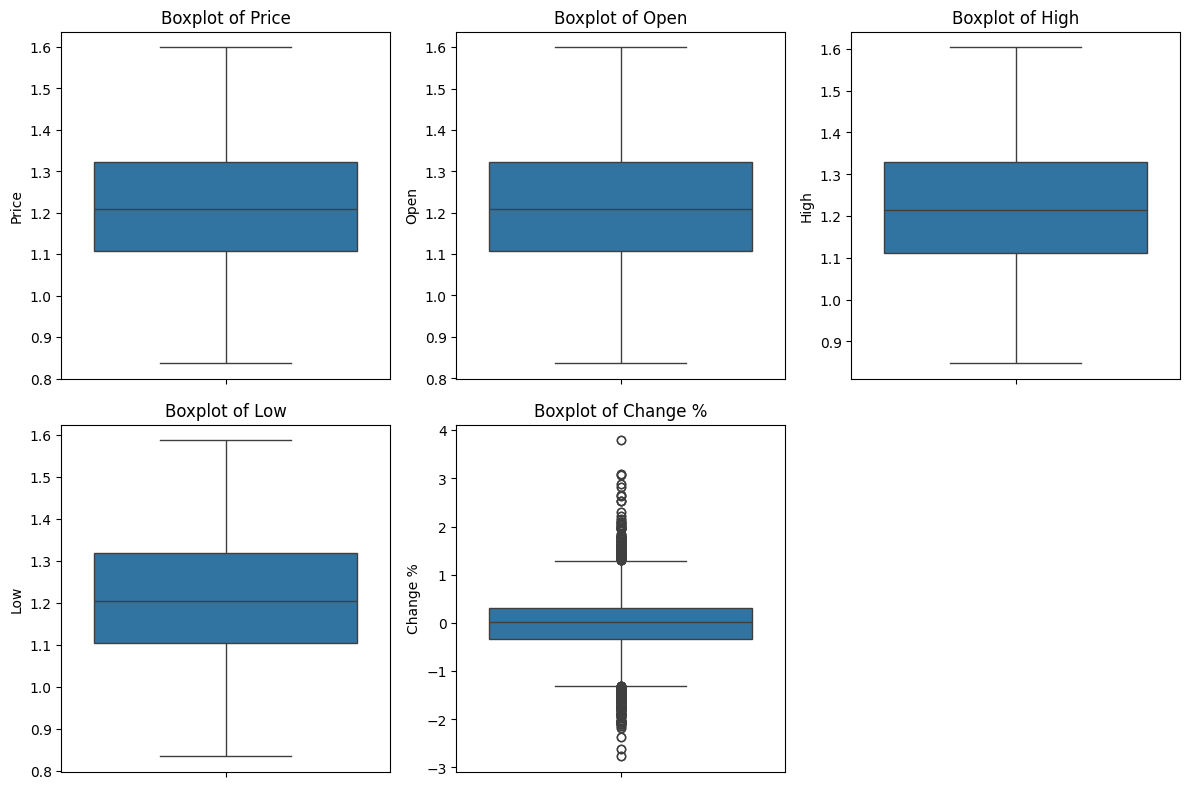

In [12]:
features = ['Price', 'Open', 'High', 'Low', 'Change %']

plt.figure(figsize=(12,8))
for i, col in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


Identify Outlier Values

In [13]:
# Using IQR to find outliers
for col in features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]
    print(f"\nOutliers detected in {col}: {len(outliers)} rows")



Outliers detected in Price: 0 rows

Outliers detected in Open: 0 rows

Outliers detected in High: 0 rows

Outliers detected in Low: 0 rows

Outliers detected in Change %: 441 rows


Handle Outliers in Change %

In [14]:
# IQR method to handle outliers
Q1 = df['Change %'].quantile(0.25)
Q3 = df['Change %'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers with the median
median_value = df['Change %'].median()
df['Change %'] = np.where(
    (df['Change %'] < lower_bound) | (df['Change %'] > upper_bound),
    median_value,
    df['Change %']
)

print("Outliers handled. Updated Change % stats:\n")
print(df['Change %'].describe())


Outliers handled. Updated Change % stats:

count    11284.000000
mean         0.008426
std          0.477498
min         -1.300000
25%         -0.290000
50%          0.010000
75%          0.300000
max          1.290000
Name: Change %, dtype: float64


Visualize the cleaned data

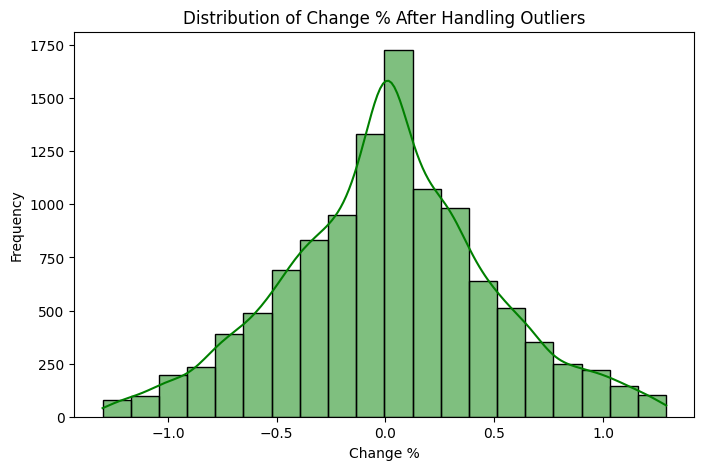

In [16]:
# Plot cleaned Change % distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Change %'], bins=20, kde=True, color='green')
plt.title('Distribution of Change % After Handling Outliers')
plt.xlabel('Change %')
plt.ylabel('Frequency')
plt.show()


Feature Engineering

Creating new features that often help time-series prediction:

   - Price lag features (previous day’s Price, previous 3-day average)

   - Volatility measures (High - Low)

   - Rolling averages Price or Change % over 7/14 days

In [19]:
# Previous day Price
df['Price_lag1'] = df['Price'].shift(1)

# 7-day rolling average of Price
df['Price_rolling7'] = df['Price'].rolling(window=7).mean()

# Volatility (High - Low)
df['Volatility'] = df['High'] - df['Low']


Check correlations

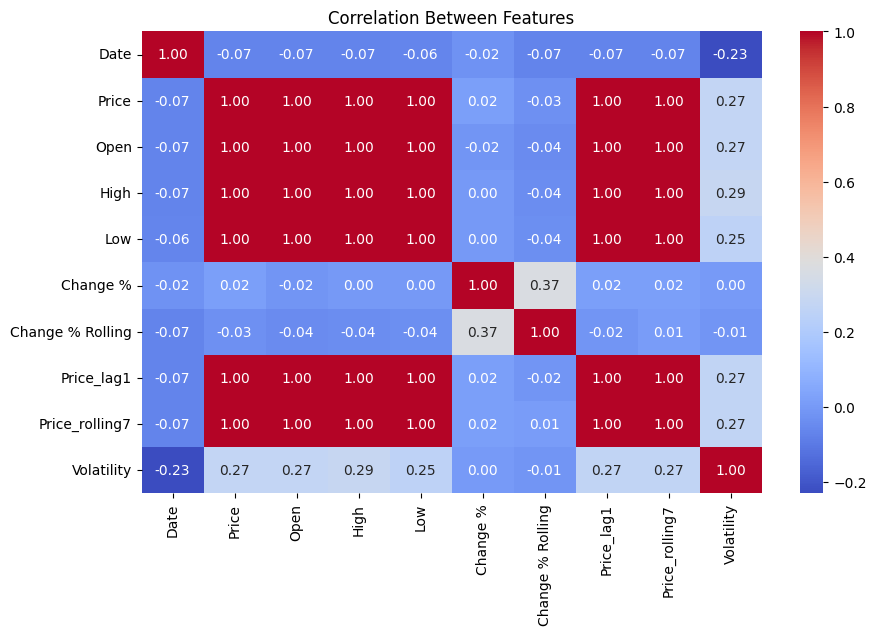

In [20]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Features')
plt.show()


Feature Preparation

In [21]:
# Drop rows with NaN created by rolling/lag
df_ml = df.dropna()

# Define features and target
X = df_ml[['Price_lag1','Price_rolling7','Volatility']]
y = df_ml['Price']  # predicting the Price

print("Features and target prepared. Sample:")
display(X.head())
display(y.head())

Features and target prepared. Sample:


,Price_lag1,Price_rolling7,Volatility
6,1.0491,1.046857,0.0094
7,1.0464,1.045500,0.0113
8,1.0382,1.043500,0.0089
9,1.0360,1.041857,0.0057
10,1.0306,1.040171,0.0107


6     1.0464
7     1.0382
8     1.0360
9     1.0306
10    1.0327
Name: Price, dtype: float64

In [22]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11278 entries, 6 to 11283
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              11278 non-null  datetime64[ns]
 1   Price             11278 non-null  float64       
 2   Open              11278 non-null  float64       
 3   High              11278 non-null  float64       
 4   Low               11278 non-null  float64       
 5   Change %          11278 non-null  float64       
 6   Change % Rolling  11278 non-null  float64       
 7   Price_lag1        11278 non-null  float64       
 8   Price_rolling7    11278 non-null  float64       
 9   Volatility        11278 non-null  float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 969.2 KB


Train/Test Split

In [27]:
from sklearn.model_selection import train_test_split

# Split into 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False  # shuffle=False for time series
)

print(f"Train size: {X_train.shape[0]}, Test size: {X_test.shape[0]}")



Train size: 9022, Test size: 2256


Train Linear Regression

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Evaluate
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression RMSE: {rmse_lr:.5f}")
print(f"Linear Regression R²: {r2_lr:.3f}")


Linear Regression RMSE: 0.00788
Linear Regression R²: 0.998


Train Random Forest Regressor

In [30]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest RMSE: {rmse_rf:.5f}")
print(f"Random Forest R²: {r2_rf:.3f}")


Random Forest RMSE: 0.00327
Random Forest R²: 1.000


Train Gradient Boosting (XGBoost)

In [29]:

from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost RMSE: {rmse_xgb:.5f}")
print(f"XGBoost R²: {r2_xgb:.3f}")


XGBoost RMSE: 0.00704
XGBoost R²: 0.999


Compare Models

In [ ]:
# Compare all models
comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost'],
    'RMSE': [rmse_lr, rmse_rf, rmse_xgb],
    'R²': [r2_lr, r2_rf, r2_xgb]
})

comparison.sort_values(by='RMSE', inplace=True)
display(comparison)

,Model,RMSE,R²
1,Random Forest,0.003268,0.999704
2,XGBoost,0.007037,0.998629
0,Linear Regression,0.007880,0.998282
